# Actividad 1 – Airbnb CDMX

In [1]:
# Montar Drive
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import matplotlib.pyplot as plt

archivo = "/content/drive/MyDrive/Module1-python/airbnb/listings.csv.gz"
df = pd.read_csv(archivo, compression="infer", low_memory=False)

print(f"Filas: {df.shape[0]:,}")
print(f"Columnas: {df.shape[1]:,}")

Mounted at /content/drive
Filas: 26,067
Columnas: 79


# Mean price

In [2]:
def clean_price(series):
    return pd.to_numeric(
        series.astype(str).str.replace(r"[^0-9\.-]", "", regex=True),
        errors="coerce"
    )

if "price" in df.columns:
    # Limpiar columna
    df["price"] = clean_price(df["price"])

    # Precio promedio con todos los datos
    mean_price = df["price"].mean()
    print(f"Precio promedio: {mean_price:,.2f}")

    # Precio promedio sin outliers (percentil 99)
    precios_filtrados = df["price"].dropna()
    precios_filtrados = precios_filtrados[
        (precios_filtrados >= 0) &
        (precios_filtrados <= precios_filtrados.quantile(0.99))
    ]
    mean_price_no_outliers = precios_filtrados.mean()
    print(f"Precio promedio (sin outliers): {mean_price_no_outliers:,.2f}")

Precio promedio: 1,665.01
Precio promedio (sin outliers): 1,422.36


# Tipos de habitación más comunes

In [3]:
if "room_type" in df.columns:
    print("Tipos de habitación más comunes:")
    print(df["room_type"].value_counts().head(10))

Tipos de habitación más comunes:
room_type
Entire home/apt    17163
Private room        8646
Shared room          170
Hotel room            88
Name: count, dtype: int64


In [4]:
if "room_type" in df.columns:
    room_counts = df["room_type"].value_counts()
    room_percent = df["room_type"].value_counts(normalize=True) * 100

    result = pd.DataFrame({
        "Cantidad": room_counts,
        "Porcentaje": room_percent.round(2)
    })

    print("Tipos de habitación más comunes:")
    print(result)

Tipos de habitación más comunes:
                 Cantidad  Porcentaje
room_type                            
Entire home/apt     17163       65.84
Private room         8646       33.17
Shared room           170        0.65
Hotel room             88        0.34


# 10 alcaldias con más alojamientos

In [5]:
posibles_cols = ["neighbourhood_cleansed", "neighbourhood", "neighborhood", "barrio"]

col_alcaldia = next((c for c in posibles_cols if c in df.columns), None)

if col_alcaldia:
    print(f"Top 10 alcaldías con más alojamientos ({col_alcaldia}):\n")
    print(df[col_alcaldia].value_counts().head(10))

Top 10 alcaldías con más alojamientos (neighbourhood_cleansed):

neighbourhood_cleansed
Cuauhtémoc               12030
Miguel Hidalgo            4441
Benito Juárez             2989
Coyoacán                  1693
Álvaro Obregón            1007
Venustiano Carranza        838
Tlalpan                    777
Gustavo A. Madero          479
Cuajimalpa de Morelos      424
Iztacalco                  421
Name: count, dtype: int64


In [6]:
if col_alcaldia:
    counts = df[col_alcaldia].value_counts()
    percent = df[col_alcaldia].value_counts(normalize=True) * 100

    top10 = pd.DataFrame({
        "Cantidad": counts.head(10),
        "Porcentaje": percent.head(10).round(2)
    })

    print(f"Top 10 alcaldías con más alojamientos ({col_alcaldia}):\n")
    print(top10)

Top 10 alcaldías con más alojamientos (neighbourhood_cleansed):

                        Cantidad  Porcentaje
neighbourhood_cleansed                      
Cuauhtémoc                 12030       46.15
Miguel Hidalgo              4441       17.04
Benito Juárez               2989       11.47
Coyoacán                    1693        6.49
Álvaro Obregón              1007        3.86
Venustiano Carranza          838        3.21
Tlalpan                      777        2.98
Gustavo A. Madero            479        1.84
Cuajimalpa de Morelos        424        1.63
Iztacalco                    421        1.62


# Las 10 personas con más alojamiento

In [7]:
if "host_name" in df.columns:
    counts = df["host_name"].value_counts()
    percent = df["host_name"].value_counts(normalize=True) * 100

    top10_hosts = pd.DataFrame({
        "Cantidad": counts.head(10),
        "Porcentaje": percent.head(10).round(2)
    })

    print("Top 10 personas con más alojamientos (host_name):\n")
    print(top10_hosts)

Top 10 personas con más alojamientos (host_name):

            Cantidad  Porcentaje
host_name                       
Alejandra        334        1.28
Alejandro        291        1.12
Raul             266        1.02
Juan             266        1.02
Luis             242        0.93
Blueground       242        0.93
Mr. W            217        0.83
Carlos           215        0.82
Jorge            212        0.81
Rodrigo          194        0.74


# Distribución de precios

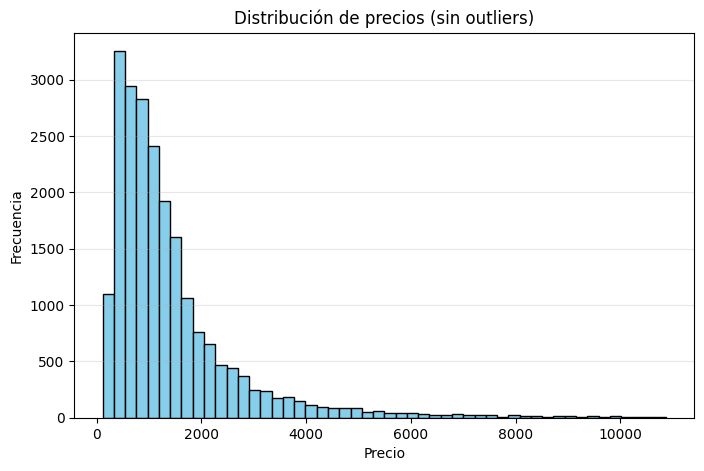

In [8]:
import matplotlib.pyplot as plt
import pandas as pd

def clean_price(series):
    return pd.to_numeric(
        series.astype(str).str.replace(r"[^0-9\.-]", "", regex=True),
        errors="coerce"
    )

if "price" in df.columns:
    df["price"] = clean_price(df["price"])

    precios_filtrados = df["price"].dropna()
    precios_filtrados = precios_filtrados[
        (precios_filtrados >= 0) &
        (precios_filtrados <= precios_filtrados.quantile(0.99))
    ]

    plt.figure(figsize=(8, 5))
    plt.hist(precios_filtrados, bins=50, color="skyblue", edgecolor="black")
    plt.title("Distribución de precios (sin outliers)")
    plt.xlabel("Precio")
    plt.ylabel("Frecuencia")
    plt.grid(axis='y', alpha=0.3)
    plt.show()

# Tipos de alojamiento en Airbnb CDMX

/tmp/ipython-input-2041557774.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


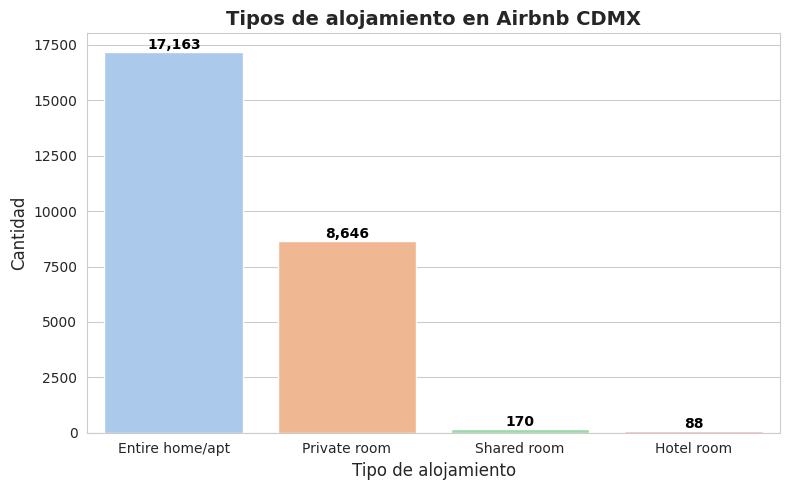

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

if "room_type" in df.columns:
    room_counts = df["room_type"].value_counts().reset_index()
    room_counts.columns = ["room_type", "count"]

    sns.set_style("whitegrid")
    plt.figure(figsize=(8,5))

    ax = sns.barplot(
        data=room_counts,
        x="room_type",
        y="count",
        palette="pastel"
    )

    plt.title("Tipos de alojamiento en Airbnb CDMX", fontsize=14, weight="bold")
    plt.xlabel("Tipo de alojamiento", fontsize=12)
    plt.ylabel("Cantidad", fontsize=12)

    for p in ax.patches:
        ax.annotate(
            f'{int(p.get_height()):,}',
            (p.get_x() + p.get_width() / 2., p.get_height()),
            ha='center', va='bottom',
            fontsize=10, color='black', weight='bold'
        )

    plt.tight_layout()
    plt.show()


# Top 10 alcaldías con más alojamientos

/tmp/ipython-input-3621996081.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


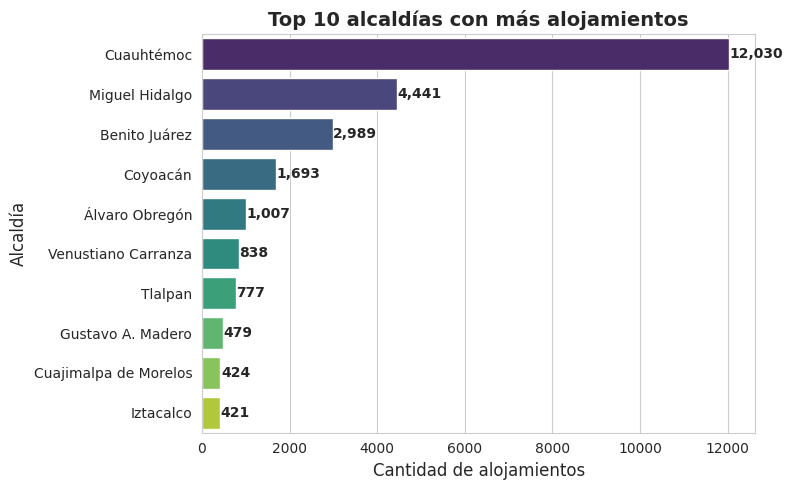

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

posibles_cols = ["neighbourhood_cleansed", "neighbourhood", "neighborhood", "barrio"]

col_alcaldia = next((c for c in posibles_cols if c in df.columns), None)

if col_alcaldia:
    top10 = df[col_alcaldia].value_counts().head(10).reset_index()
    top10.columns = ["Alcaldía", "Cantidad"]

    sns.set_style("whitegrid")
    plt.figure(figsize=(8,5))

    ax = sns.barplot(
        data=top10,
        x="Cantidad",
        y="Alcaldía",
        palette="viridis"
    )

    plt.title("Top 10 alcaldías con más alojamientos", fontsize=14, weight="bold")
    plt.xlabel("Cantidad de alojamientos", fontsize=12)
    plt.ylabel("Alcaldía", fontsize=12)

    for p in ax.patches:
        plt.text(
            p.get_width() + 10,
            p.get_y() + p.get_height() / 2,
            f"{int(p.get_width()):,}",
            va='center', fontsize=10, weight='bold'
        )

    plt.tight_layout()
    plt.show()


# Distribución geografica de precios


In [11]:
import plotly.express as px
import pandas as pd

if all(col in df.columns for col in ["latitude", "longitude", "price"]):
    # Limpiar 'price'
    df["price"] = pd.to_numeric(
        df["price"].astype(str).str.replace(r"[^0-9\.-]", "", regex=True),
        errors="coerce"
    )

    df_map = df.dropna(subset=["latitude", "longitude", "price"]).copy()
    df_map = df_map[
        (df_map["price"] >= 0) &
        (df_map["price"] <= df_map["price"].quantile(0.99))
    ]

    fig = px.scatter_mapbox(
        df_map,
        lat="latitude",
        lon="longitude",
        color="price",
        size="price",
        size_max=10,
        color_continuous_scale=px.colors.sequential.Viridis,
        zoom=10,
        mapbox_style="carto-positron",
        title="Distribución geográfica de precios en Airbnb CDMX"
    )

    fig.show()


# Análisis de medidas de tendencia y dispersión

Se calculan estadísticas descriptivas para la variable `price`, con el fin de complementar el análisis: mediana, moda y desviación estándar.


In [12]:
import pandas as pd
from scipy import stats

mediana = df["price"].median()
moda = df["price"].mode()[0] if not df["price"].mode().empty else None
desv_std = df["price"].std()
percentiles = df["price"].quantile([0.25, 0.5, 0.75, 0.95, 0.99])

print(f"Mediana: {mediana:,.2f}")
print(f"Moda: {moda:,.2f}" if moda is not None else "No hay moda definida")
print(f"Desviación estándar: {desv_std:,.2f}")
print("\nPercentiles:")
print(percentiles)

Mediana: 1,055.00
Moda: 450.00
Desviación estándar: 4,343.32

Percentiles:
0.25      630.00
0.50     1055.00
0.75     1722.00
0.95     4297.00
0.99    10880.94
Name: price, dtype: float64


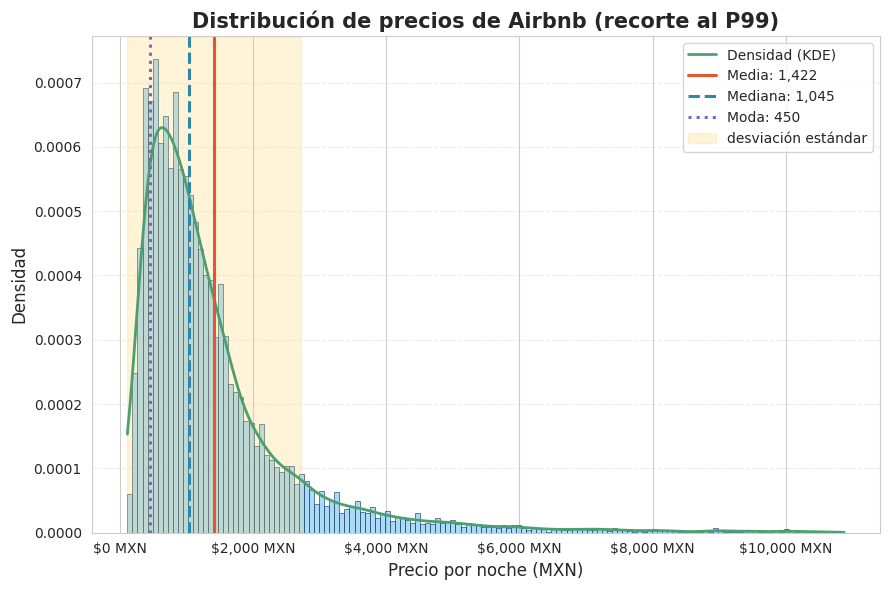

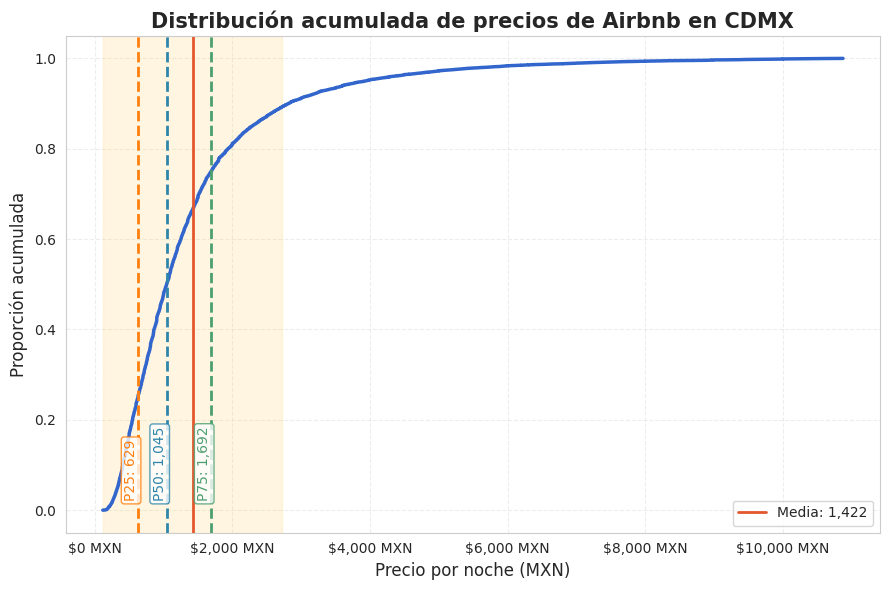

Media:   $1,422  | Mediana: $1,045  | Moda: $450
Desviación estándar: $1,305  | Corte P99: $10,881


In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def clean_price(series: pd.Series) -> pd.Series:
    return pd.to_numeric(series.astype(str).str.replace(r"[^0-9\.-]", "", regex=True), errors="coerce")

def compute_mode(series: pd.Series):
    vc = series.value_counts(dropna=True)
    return None if vc.empty else vc.index[0]

def format_mxn(x, pos=None):
    return f"${x:,.0f} MXN"

assert "price" in df.columns, "No existe la columna 'price' en el DataFrame."
prices = clean_price(df["price"]).dropna()
p99 = prices.quantile(0.99)
viz = prices[(prices >= 0) & (prices <= p99)].copy()

mean_  = viz.mean()
median_= viz.median()
mode_  = compute_mode(viz)
std_   = viz.std()

plt.figure(figsize=(9,6))

n, bins, patches = plt.hist(
    viz, bins="auto", density=True, alpha=0.65,
    color="#7BC8F6", edgecolor="#1B3B5F", linewidth=0.7
)

try:
    from scipy.stats import gaussian_kde
    kde = gaussian_kde(viz)
    xs = np.linspace(viz.min(), viz.max(), 512)
    plt.plot(xs, kde(xs), linewidth=2.0, color="#4C9F70", label="Densidad (KDE)")
except Exception:
    pass

plt.axvline(mean_,   color="#E4572E", linewidth=2.2, linestyle="-",  label=f"Media: {mean_:,.0f}")
plt.axvline(median_, color="#2E86AB", linewidth=2.2, linestyle="--", label=f"Mediana: {median_:,.0f}")
if mode_ is not None:
    plt.axvline(mode_,   color="#845EC2", linewidth=2.2, linestyle=":",  label=f"Moda: {mode_:,.0f}")

plt.axvspan(mean_ - std_, mean_ + std_, color="#FFD166", alpha=0.25, label="desviación estándar")

plt.title("Distribución de precios de Airbnb (recorte al P99)", fontsize=15, weight="bold")
plt.xlabel("Precio por noche (MXN)", fontsize=12)
plt.ylabel("Densidad", fontsize=12)
plt.legend(frameon=True, fontsize=10)
plt.grid(axis="y", linestyle="--", alpha=0.35)

from matplotlib.ticker import FuncFormatter
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_mxn))
plt.tight_layout()
plt.show()

plt.figure(figsize=(9,6))
sorted_vals = np.sort(viz.values)
y = np.arange(1, len(sorted_vals)+1) / len(sorted_vals)
plt.plot(sorted_vals, y, linewidth=2.5, color="#3366CC")

for q, col in [(0.25, "#FF7F0E"), (0.50, "#2E86AB"), (0.75, "#4C9F70")]:
    xq = np.quantile(viz, q)
    plt.axvline(xq, color=col, linestyle="--", linewidth=2)
    plt.text(xq, 0.02 + q*0, f"P{int(q*100)}: {xq:,.0f}", color=col, rotation=90,
             va="bottom", ha="right", fontsize=10, bbox=dict(boxstyle="round,pad=0.2", fc="white", ec=col, alpha=0.8))

plt.axvline(mean_, color="#E4572E", linestyle="-",  linewidth=2, label=f"Media: {mean_:,.0f}")
plt.axvspan(mean_ - std_, mean_ + std_, color="#FFD166", alpha=0.20)

plt.title("Distribución acumulada de precios de Airbnb en CDMX", fontsize=15, weight="bold")
plt.xlabel("Precio por noche (MXN)", fontsize=12)
plt.ylabel("Proporción acumulada", fontsize=12)
plt.gca().xaxis.set_major_formatter(FuncFormatter(format_mxn))
plt.grid(linestyle="--", alpha=0.35)
plt.legend(loc="lower right", fontsize=10, frameon=True)
plt.tight_layout()
plt.show()

print(f"Media:   ${mean_:,.0f}  | Mediana: ${median_:,.0f}  | Moda: ${mode_:,.0f}" if mode_ is not None else
      f"Media:   ${mean_:,.0f}  | Mediana: ${median_:,.0f}  | Moda: —")
print(f"Desviación estándar: ${std_:,.0f}  | Corte P99: ${p99:,.0f}")


# Diferencia entre estadísticas crudas y filtradas

Al calcular las medidas de tendencia central y dispersión de la variable `price`, se obtuvieron dos conjuntos de resultados:

1. **Estadísticas crudas (todos los datos):**
   - Mediana: $1,055 MXN  
   
   - Moda: $450 MXN  
   
   - Desviación estándar: $4,343 MXN  
   
   - Percentil 99: $108,809 MXN  

   Estos valores reflejan **la presencia de outliers muy extremos** (alojamientos con precios excesivamente altos), lo que aumenta artificialmente la media y la desviación estándar.

2. **Estadísticas filtradas (recorte al P99 ≈ $10,881 MXN):**
  
   - Media: $1,422 MXN  
   
   - Mediana: $1,045 MXN  
   
   - Moda: $450 MXN  
   
   - Desviación estándar: $1,305 MXN  

   Aquí se eliminaron los valores más extremos (1% superior). Esto ofrece una visión **más realista del cliente típico**, donde la media y la mediana están mucho más cercanas, y la dispersión es más razonable.

---

## Conclusión
  - El análisis crudo muestra que existen precios extremadamente altos que sesgan la distribución.  
  - El análisis filtrado es más útil para describir patrones generales y tomar decisiones, porque reduce el impacto de los outliers.  

Los datos **filtrados al percentil 99**  representan mejor al “cliente típico” de Airbnb en la CDMX.
